In [7]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [23]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# Getting data

google = web.DataReader("GOOG", "yahoo")

In [24]:
scaler = MinMaxScaler()

In [48]:
# Scaling and reshaping the trainig data
# X -> t, y -> t+1

training_data = google['2012-01-03':'2016-12-31']
training_data = training_data.iloc[:, 1:2].values
scaled_training_data = scaler.fit_transform(training_data)
X_train = scaled_training_data[:-1]
X_train = np.reshape(X_train, (X_train.shape[0], 1, 1))
y_train = scaled_training_data[1:]

In [49]:
# Scaling and reshaping training data
testing_data = google['2017-01-04':]
testing_data = testing_data.iloc[:, 1:2].values
X_test = testing_data[:-1]
X_test_scaled = scaler.transform(X_test)
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, 1))
y_test = testing_data[1:]

In [112]:
# Building the model

def build_model():
    model = Sequential()
    model.add(LSTM(15, activation='sigmoid', input_shape = (None, 1)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

In [113]:
# Training the model and making prediction
model = build_model()

model.fit(X_train, y_train, batch_size=32, epochs=300, verbose=0)

inputs = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, 1))

y_hat = model.predict(inputs)

y_hat = scaler.inverse_transform(y_hat)

In [85]:
from sklearn.metrics import r2_score, mean_squared_error

In [114]:
print("R^2:", r2_score(y_test, y_hat))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_hat)))

R^2: 0.981289053735
RMSE: 8.15204900967


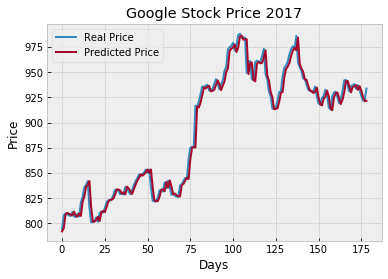

In [117]:
plt.plot(y_test, label='Real Price')
plt.plot(y_hat, label='Predicted Price')
plt.title('Google Stock Price 2017')
plt.xlabel('Days')
plt.ylabel("Price")
plt.legend()
plt.show()